# Capstone Project: Find the best neighborhood to buy a house in Texas

## Python Script

**By Olufunmi Olugbode**

### This section details the python script used to evaluate my preferred location to purchase a home. I am trying to decide between Houston and or Duncanville TX and I plan to collect data by the region or postal code to cluster and geo spatial map of the results showing the best neighborhood to buy a house. 

## **Load the required libraries**

In [12]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

## Scrape  - using beautifulsoup to retrieve data|

In [13]:
res = requests.get('https://ucr.fbi.gov/crime-in-the-u.s/2016/crime-in-the-u.s.-2016/tables/table-6/table-6-state-cuts/texas.xls')
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))

 ## 1. Dataset A - Crime Rate

**i. Wrangle/transform the data and convert the list back into a dataframe** 

In [14]:
df_Crime = pd.DataFrame(df[0])

**ii. Clean data to show specific crimes**

In [15]:
df_Crime.drop('Murder andnonnegligentmanslaughter', inplace=True, axis=1)
df_Crime.drop('Rape(reviseddefinition1)', inplace=True, axis=1)
df_Crime.drop('Rape(legacydefinition2)', inplace=True, axis=1)
df_Crime.drop('Aggravatedassault', inplace=True, axis=1)
df_Crime.drop('Larceny-theft', inplace=True, axis=1)
df_Crime

,City,Population,Violentcrime,Robbery,Propertycrime,Burglary,Motorvehicletheft,Arson
0,Abernathy,2728,3,0,57.0,23.0,5,0
1,Abilene,122523,546,133,4269.0,905.0,251,21
2,Addison,16067,101,28,840.0,100.0,90,6
3,Alamo,19409,166,26,1013.0,108.0,72,3
4,Alamo Heights,8248,8,2,268.0,37.0,4,1
...,...,...,...,...,...,...,...,...
620,Woodway,8836,15,1,113.0,5.0,6,0
621,Wortham,1019,2,0,15.0,9.0,0,0
622,Wylie,47772,50,6,411.0,60.0,21,2
623,Yoakum,6059,14,3,94.0,44.0,1,1


## 1A.  Load Texas geospatial cooridinates and merge to Crime Rate data

In [16]:
# Found the table using beautifulsoup and used Pandas to read it in. 
res = requests.get('https://www.mapsofworld.com/usa/states/texas/lat-long.html')
soup = BeautifulSoup(res.content,'lxml')
table1 = soup.find_all('table')[2] 
gf= pd.read_html(str(table1))

#Read into dataframe
geo = pd.DataFrame(gf[0])

#3.CLEAN DATA
#Get rid of header in the table
geo.columns = range(geo.shape[1])
#Replace header
geo.rename(columns={0 : "Cit", 1: "Latitude", 2: "Longitude"}, inplace=True)
#dropping null value columns to avoid errors
geo.dropna(inplace = True)
# new data frame with split value columns
new = geo["Cit"].str.split(" ", n = 1, expand = True)
# making separate first name column from new data frame
geo["City"]= new[0]
# making separate last name column from new data frame
geo["City2"]= new[1]
# Dropping old Name columns
geo.drop(columns =["Cit"], inplace = True)
#Drop City2 Column
geo.drop('City2', inplace=True, axis=1)
geo

,Latitude,Longitude,City
0,31.89,-97.08,Abbott
1,33.83,-101.85,Abernathy
2,32.45,-99.74,Abilene
3,26.22,-98.42,Abram
4,32.53,-101.72,Ackerly
...,...,...,...
1746,26.90,-99.26,Zapata
1747,26.36,-97.82,Zapata
1748,26.32,-98.64,Zarate
1749,31.16,-94.42,Zavalla


## 1B. Merge Crime Rate data with geospatial coordinate data

In [17]:
geo_Crime = pd.merge(df_Crime, geo, on='City', how='inner')

# display the new dataframe
geo_Crime

,City,Population,Violentcrime,Robbery,Propertycrime,Burglary,Motorvehicletheft,Arson,Latitude,Longitude
0,Abernathy,2728,3,0,57.0,23.0,5,0,33.83,-101.85
1,Abilene,122523,546,133,4269.0,905.0,251,21,32.45,-99.74
2,Addison,16067,101,28,840.0,100.0,90,6,32.96,-96.84
3,Alamo,19409,166,26,1013.0,108.0,72,3,26.18,-98.12
4,Alamo,19409,166,26,1013.0,108.0,72,3,29.48,-98.47
...,...,...,...,...,...,...,...,...,...,...
473,Woodway,8836,15,1,113.0,5.0,6,0,31.50,-97.23
474,Wortham,1019,2,0,15.0,9.0,0,0,31.79,-96.46
475,Wylie,47772,50,6,411.0,60.0,21,2,33.04,-96.52
476,Yoakum,6059,14,3,94.0,44.0,1,1,29.29,-97.15


## 1C. Compare Houston and Duncanville Crime Data

In [18]:
#Surrounding cities that are with the proximity of the Duncanville and Houston area are also evaluated
Crime_compare_city = geo_Crime.iloc[[105,122,196,209],:]
Crime_compare_city

,City,Population,Violentcrime,Robbery,Propertycrime,Burglary,Motorvehicletheft,Arson,Latitude,Longitude
105,Dallas,1320939,10071,4604,44910.0,10948.0,7592,369,32.79,-96.77
122,Duncanville,40075,203,121,1249.0,240.0,188,1,32.65,-96.91
196,Houston,2334348,23960,9962,100856.0,18488.0,12738,668,29.78,-95.39
209,Irving,240765,521,213,6490.0,1183.0,633,23,32.86,-96.97


### Given the population of Duncanville it is more likely that the active lifestyle I require will not be found in the area. The Houston area seems to be populous, however the crime rate is a concern, therefore, the surrounding areas close to Duncanville (Dallas and Irving) will be assessed going forward.

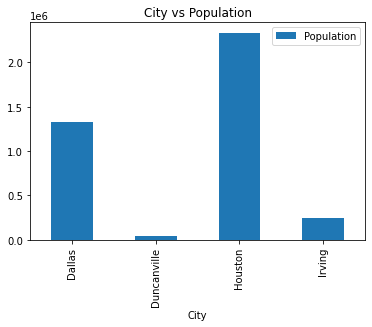

In [91]:
#Area Density
Crime_compare_city.plot(x="City", y=["Population"], kind="bar")
plt.title('City vs Population')
plt.show()

### Dallas and Houston are populated compared to Duncanville and Irving

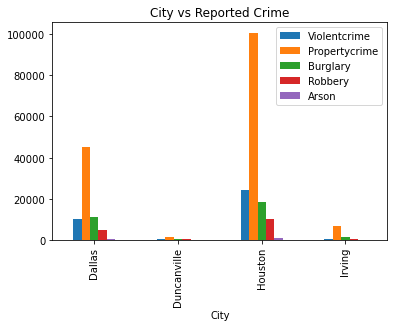

In [360]:
#Impact of crime in the area
Crime_compare_city.plot(x="City", y=["Violentcrime", "Propertycrime","Burglary","Robbery", "Arson"], kind="bar")
plt.title('City vs Reported Crime')
plt.show()

### Dallas and the surrounding areas have lower crime rates compared to the Houston Area

 ## 2. Dataset B - School District

i. Load csv file from URL
csv file is obtained from https://www.schooldigger.com/go/TX/cityrank.aspx?t=name

In [94]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_1 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_1 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

body = client_1.get_object(Bucket='pythonbasicsfordatascienceproject-donotdelete-pr-swzn0sey3uygef',Key='SCHOOLRANKING_2019.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_School = pd.read_csv(body)
df_School

,Rank (2018-19),City,City URL,Number of Elementary Schools,Number of Middle Schools,Number of High Schools,Number of Alternative Schools,Number of Private Schools,Rank Score (2019),Rank Score (2018),Rank (2018),Rank Change from 2018,SchoolDigger Star Rating (2019)
0,1,Southlake,https://www.schooldigger.com/go/TX/city/Southl...,6,4,1,1,4,0.994605,0.993848,1,0,5
1,2,Fairview,https://www.schooldigger.com/go/TX/city/Fairvi...,1,1,0,0,0,0.993749,0.9885294,3,1,5
2,3,Lucas,https://www.schooldigger.com/go/TX/city/Lucas/...,1,1,1,0,2,0.986270,0.9819682,5,2,5
3,4,Fair Oaks Ranch,https://www.schooldigger.com/go/TX/city/Fair+O...,2,0,0,0,0,0.972092,0.9713236,6,2,5
4,5,Devers,https://www.schooldigger.com/go/TX/city/Devers...,1,1,0,0,0,0.955027,0.9510684,8,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,893,Marlin,https://www.schooldigger.com/go/TX/city/Marlin...,1,2,1,0,0,0.063475,0.0671067,882,-11,0
893,894,Hearne,https://www.schooldigger.com/go/TX/city/Hearne...,1,1,1,0,0,0.059804,0.0609246,884,-10,0
894,895,Damon,https://www.schooldigger.com/go/TX/city/Damon/...,1,0,1,0,0,0.059777,0.0783264,880,-15,0
895,896,Kermit,https://www.schooldigger.com/go/TX/city/Kermit...,1,1,1,0,0,0.059743,0.0931219,876,-20,0


## 2A. Merge School District data with geospatial coordinate data

In [98]:
geo_School = pd.merge(df_School, geo, on='City', how='inner')

# display the new dataframe
geo_School

,Rank (2018-19),City,City URL,Number of Elementary Schools,Number of Middle Schools,Number of High Schools,Number of Alternative Schools,Number of Private Schools,Rank Score (2019),Rank Score (2018),Rank (2018),Rank Change from 2018,SchoolDigger Star Rating (2019),Latitude,Longitude
0,1,Southlake,https://www.schooldigger.com/go/TX/city/Southl...,6,4,1,1,4,0.994605,0.993848,1,0,5,32.95,-97.15
1,2,Fairview,https://www.schooldigger.com/go/TX/city/Fairvi...,1,1,0,0,0,0.993749,0.9885294,3,1,5,33.14,-96.61
2,3,Lucas,https://www.schooldigger.com/go/TX/city/Lucas/...,1,1,1,0,2,0.986270,0.9819682,5,2,5,33.10,-96.58
3,5,Devers,https://www.schooldigger.com/go/TX/city/Devers...,1,1,0,0,0,0.955027,0.9510684,8,3,5,30.03,-94.59
4,8,Murphy,https://www.schooldigger.com/go/TX/city/Murphy...,2,1,0,1,1,0.942646,0.9571533,7,-1,5,33.02,-96.61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707,891,Creedmoor,https://www.schooldigger.com/go/TX/city/Creedm...,1,0,0,0,0,0.084617,0.0724936,881,-10,0,30.09,-97.74
708,893,Marlin,https://www.schooldigger.com/go/TX/city/Marlin...,1,2,1,0,0,0.063475,0.0671067,882,-11,0,31.31,-96.89
709,894,Hearne,https://www.schooldigger.com/go/TX/city/Hearne...,1,1,1,0,0,0.059804,0.0609246,884,-10,0,30.88,-96.6
710,895,Damon,https://www.schooldigger.com/go/TX/city/Damon/...,1,0,1,0,0,0.059777,0.0783264,880,-15,0,29.28,-95.74


## 2B. Compare Houston and Duncanville School District Data

In [100]:
#Surrounding cities that are with the proximity of the Duncanville and Houston area are also evaluated
School_compare_city = df_School.iloc[[493,553,568,733],:]
School_compare_city

,Rank (2018-19),City,City URL,Number of Elementary Schools,Number of Middle Schools,Number of High Schools,Number of Alternative Schools,Number of Private Schools,Rank Score (2019),Rank Score (2018),Rank (2018),Rank Change from 2018,SchoolDigger Star Rating (2019)
493,494,Irving,https://www.schooldigger.com/go/TX/city/Irving...,31,11,11,3,16,0.465074,0.4400131,525,31,2
553,554,Dallas,https://www.schooldigger.com/go/TX/city/Dallas...,231,69,68,26,94,0.422790,0.4190378,564,10,2
568,569,Houston,https://www.schooldigger.com/go/TX/city/Housto...,472,160,137,40,175,0.418287,0.4279484,554,-15,2
733,734,Duncanville,https://www.schooldigger.com/go/TX/city/Duncan...,7,5,3,1,1,0.309011,0.2148286,816,82,1


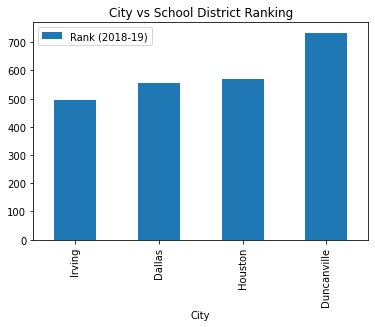

In [364]:
#Impact of crime in the area
School_compare_city.plot(x="City", y=["Rank (2018-19)"], kind="bar")
plt.title('City vs School District Ranking')
plt.show()

### Irving has a better school district and the Dallas and Houston area appear adequate. Duncanville comes in last, however, there are several private schools in the area.

## 3. Dataset C - Median Income

In [33]:
# Found the table using beautifulsoup and used Pandas to read it in. 
res = requests.get('https://www.indexmundi.com/facts/united-states/quick-facts/texas/median-household-income/cities#table')
soup = BeautifulSoup(res.content,'lxml')
table2 = soup.find_all('table') [1]
df2= pd.read_html(str(table2))

#Read into dataframe
df_income = pd.DataFrame(df2[0])
#Rename Column
df_income.columns =['City', 'Median household income, $ (2018)']
df_income

,City,"Median household income, $ (2018)"
0,Abilene,47689
1,Addison,73383
2,Alamo,39275
3,Alamo Heights,132313
4,Aldine,38964
...,...,...
374,Windcrest,79604
375,Woodway,81515
376,Wylie,93637
377,Yoakum,40804


## 3A. Merge Median Income data with geospatial coordinate data

In [34]:
geo_income = pd.merge(df_income, geo, on='City', how='inner')

# display the new dataframe
geo_income

,City,"Median household income, $ (2018)",Latitude,Longitude
0,Abilene,47689,32.45,-99.74
1,Addison,73383,32.96,-96.84
2,Alamo,39275,26.18,-98.12
3,Alamo,39275,29.48,-98.47
4,Aldine,38964,29.91,-95.38
...,...,...,...,...
292,Woodway,81515,31.50,-97.23
293,Wylie,93637,33.04,-96.52
294,Yoakum,40804,29.29,-97.15
295,Zapata,33566,26.90,-99.26


## 3B. Compare Houston and Duncanville Median Income Data

In [367]:
#Surrounding cities that are with the proximity of the Duncanville and Houston area are also evaluated
income_compare_city = df_income.iloc[[90,169],:]
income_compare_city

,City,"Median household income, $ (2018)"
90,Dallas,50100
169,Houston,51140


### Information for Duncanville is not given in the table, therefore additional research for just the Duncanville, TX area. 
### The following chart shows how the median household income in Duncanville (2018 to draw a comparison with Houston Data), TX compares to that of its neighboring and parent geographies.

In [368]:
# Load File
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_2 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_2 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

body = client_2.get_object(Bucket='pythonbasicsfordatascienceproject-donotdelete-pr-swzn0sey3uygef',Key='Median Household Income 2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_income2 = pd.read_csv(body)
df_income2

,ID Year,Year,Household Income by Race,Household Income by Race Moe,Geography,ID Geography,Slug Geography
0,2018,2018,60293,140.0,United States,01000US,united-states
1,2018,2018,59570,209.0,Texas,04000US48,texas
2,2018,2018,56854,391.0,"Dallas County, TX",05000US48113,dallas-county-tx
3,2018,2018,55224,4002.0,"Duncanville, TX",16000US4821628,duncanville-tx
4,2018,2018,66982,327.0,"Dallas-Fort Worth-Arlington, TX",31000US19100,dallas-fort-worth-arlington-tx
5,2018,2018,38899,1737.0,"North of I-20 & West of I-35E PUMA, TX",79500US4802316,north-of-i-20-west-of-i-35e-puma-tx
6,2018,2018,59389,2269.0,"Cedar Hill & Duncanville Cities PUMA, TX",79500US4802318,cedar-hill-duncanville-cities-puma-tx
7,2018,2018,55049,2240.0,Grand Prairie (Central) & Dallas (Southwest) C...,79500US4802319,grand-prairie-central-dallas-southwest-cities-...
8,2017,2017,57652,138.0,United States,01000US,united-states
9,2017,2017,57051,183.0,Texas,04000US48,texas


### Households in Duncanville, TX have a median annual income of 55,224 US dollars in 2018 which is comparable to the income in Houston but less than the median annual income of 60,293 US dollars across the entire United States. 

### Based on the results of the dataset shown above, Duncanville,TX and the Dallas area will better suit my preferences. 

## 4. List of Restaurants or Venues for Duncanville and surrounding areas
### Note that from this point the analysis will focus on the Duncanville and surrounding areas

In [375]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported.')

Libraries imported.


### Note Foursquare credentials will be hidden

In [19]:
CLIENT_ID = 'BLOCKED' # your Foursquare ID


CLIENT_SECRET = 'BLOCKED' # your Foursquare Secret


VERSION = 'BLOCKED' # Foursquare API version

In [20]:
#Let's explore neighborhoods in our dataframe.
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

LIMIT = 200 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [21]:
#Geospatial data
TO_data = Crime_compare_city
TO_data

,City,Population,Violentcrime,Robbery,Propertycrime,Burglary,Motorvehicletheft,Arson,Latitude,Longitude
105,Dallas,1320939,10071,4604,44910.0,10948.0,7592,369,32.79,-96.77
122,Duncanville,40075,203,121,1249.0,240.0,188,1,32.65,-96.91
196,Houston,2334348,23960,9962,100856.0,18488.0,12738,668,29.78,-95.39
209,Irving,240765,521,213,6490.0,1183.0,633,23,32.86,-96.97


## 4A Get all the Venues for the specific locations in Texas

In [22]:
# Get all of the Venues
TO_venues = getNearbyVenues(names=TO_data['City'],
                                   latitudes=TO_data['Latitude'],
                                   longitudes=TO_data['Longitude']
                                  )

Dallas
Duncanville
Houston
Irving


In [23]:
TO_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Dallas,14,14,14,14,14,14
Duncanville,13,13,13,13,13,13
Houston,19,19,19,19,19,19
Irving,3,3,3,3,3,3


In [24]:
# Let's pick out restaurants from Venue Categories

print('Unique Venue Categories:')
list(TO_venues['Venue Category'].unique())

Unique Venue Categories:


['Nightclub',
 'Burger Joint',
 'Mexican Restaurant',
 'Fast Food Restaurant',
 'Convenience Store',
 'BBQ Joint',
 'Chinese Restaurant',
 'Museum',
 'American Restaurant',
 'Bank',
 'Park',
 'Italian Restaurant',
 'Ice Cream Shop',
 'Pet Store',
 'Spa',
 'Seafood Restaurant',
 'Asian Restaurant',
 'Pharmacy',
 'Taco Place',
 'Café',
 'Vietnamese Restaurant',
 'Bar',
 'Juice Bar',
 'Cajun / Creole Restaurant',
 'Yoga Studio',
 'Bagel Shop',
 'Pub',
 'Southern / Soul Food Restaurant',
 'Liquor Store',
 'Playground',
 'Basketball Court',
 'Frozen Yogurt Shop']

In [25]:
#Included interest from Unique Venue Categories in the above
rest_list = ['Nightclub','Burger Joint', 'Mexican Restaurant','Fast Food Restaurant','Convenience Store','BBQ Joint','Chinese Restaurant','Museum','American Restaurant','Bank','Park','Italian Restaurant',
 'Ice Cream Shop','Pet Store','Spa','Seafood Restaurant','Asian Restaurant','Pharmacy','Taco Place','Café','Vietnamese Restaurant','Bar','Juice Bar','Cajun / Creole Restaurant','Yoga Studio',
 'Bagel Shop','Pub','Southern / Soul Food Restaurant','Liquor Store','Playground','Basketball Court','Frozen Yogurt Shop']

rest_pd = pd.DataFrame(rest_list)
#rest_pd
#rename the coloumns so the match
rest_pd = rest_pd.rename(columns={0:'Venue Category'})

#Join the 2 dataframes as instructed
TO_new = pd.merge(TO_venues, rest_pd, on='Venue Category', how='right')

# display the new dataframe
#TO_new

TO_new.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Dallas,14,14,14,14,14,14
Duncanville,13,13,13,13,13,13
Houston,19,19,19,19,19,19
Irving,3,3,3,3,3,3


## 4B. Count Restaurants

In [26]:
# one hot encoding
TO_new_onehot = pd.get_dummies(TO_new[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
TO_new_onehot['Neighborhood'] = TO_new['Neighborhood'] 


# move neighborhood column to the first column
fixed_columns = [TO_new_onehot.columns[-1]] + list(TO_new_onehot.columns[:-1])
TO_new_onehot = TO_new_onehot[fixed_columns]

TO_new_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bank,Bar,Basketball Court,Burger Joint,Café,...,Pet Store,Pharmacy,Playground,Pub,Seafood Restaurant,Southern / Soul Food Restaurant,Spa,Taco Place,Vietnamese Restaurant,Yoga Studio
0,Dallas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Dallas,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Duncanville,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,Houston,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,Dallas,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
#Analyze each neighbourhood
TO_groupd = TO_new_onehot.groupby('Neighborhood').mean().reset_index()
TO_groupd.shape

TO_groupd.head()

,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bank,Bar,Basketball Court,Burger Joint,Café,...,Pet Store,Pharmacy,Playground,Pub,Seafood Restaurant,Southern / Soul Food Restaurant,Spa,Taco Place,Vietnamese Restaurant,Yoga Studio
0,Dallas,0.071429,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Duncanville,0.000000,0.076923,0.000000,0.000000,0.076923,0.000000,0.000000,0.076923,0.000000,...,0.076923,0.076923,0.000000,0.000000,0.076923,0.000000,0.076923,0.000000,0.000000,0.000000
2,Houston,0.052632,0.000000,0.000000,0.052632,0.000000,0.157895,0.000000,0.052632,0.052632,...,0.000000,0.000000,0.000000,0.052632,0.000000,0.052632,0.000000,0.052632,0.052632,0.052632
3,Irving,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,...,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


#  5. Begin to Cluster in the Duncanville and Surrounding areas

In [28]:
#drop row 
TO_grouped = TO_groupd.drop(2)
TO_grouped

,Neighborhood,American Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bank,Bar,Basketball Court,Burger Joint,Café,...,Pet Store,Pharmacy,Playground,Pub,Seafood Restaurant,Southern / Soul Food Restaurant,Spa,Taco Place,Vietnamese Restaurant,Yoga Studio
0,Dallas,0.071429,0.000000,0.071429,0.0,0.000000,0.0,0.000000,0.071429,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
1,Duncanville,0.000000,0.076923,0.000000,0.0,0.076923,0.0,0.000000,0.076923,0.0,...,0.076923,0.076923,0.000000,0.0,0.076923,0.0,0.076923,0.0,0.0,0.0
3,Irving,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.333333,0.000000,0.0,...,0.000000,0.000000,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0


In [29]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np


TO_grouped_clustering = TO_grouped.drop('Neighborhood', 1)

# Use silhouette score to find optimal number of clusters to segment the data
kclusters = np.arange(2,3)
results = {}
for size in kclusters:
    model = KMeans(n_clusters = size).fit(TO_grouped_clustering)
    predictions = model.predict(TO_grouped_clustering)
    results[size] = silhouette_score(TO_grouped_clustering, predictions)

best_size = max(results, key=results.get)
best_size

2

## 5A. Run K means and segment data into clusters and generate labels

In [30]:
#import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = best_size


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(TO_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 0, 1], dtype=int32)

In [31]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = TO_grouped['Neighborhood']

for ind in np.arange(TO_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(TO_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dallas,Mexican Restaurant,Chinese Restaurant,American Restaurant,Nightclub,Convenience Store,Museum,Burger Joint,BBQ Joint,Fast Food Restaurant,Basketball Court
1,Duncanville,Italian Restaurant,Pharmacy,Ice Cream Shop,Burger Joint,Mexican Restaurant,Convenience Store,Pet Store,Park,Bank,Seafood Restaurant
3,Irving,Playground,Basketball Court,Frozen Yogurt Shop,Yoga Studio,Ice Cream Shop,Asian Restaurant,BBQ Joint,Bagel Shop,Bank,Bar


### Duncaville has venues that fit my lifestyle, however, Dallas has some spots that are interesting.

## 5B. Merge the Duncanville and surrounding Area data with geo cooridinate data and make sure it's the right shape

In [32]:
#Rename column from 'City' and 'Neighborhood'
TO_data.columns=["Neighborhood", "Population", "Violentcrime", "Robbery", "Propertycrime", "Burglary", "Motorvehicletheft", "Arson", "Latitude", "Longitude"]
TO_data1 = TO_data.drop(196)
TO_data1

,Neighborhood,Population,Violentcrime,Robbery,Propertycrime,Burglary,Motorvehicletheft,Arson,Latitude,Longitude
105,Dallas,1320939,10071,4604,44910.0,10948.0,7592,369,32.79,-96.77
122,Duncanville,40075,203,121,1249.0,240.0,188,1,32.65,-96.91
209,Irving,240765,521,213,6490.0,1183.0,633,23,32.86,-96.97


In [33]:
#Merge the Texas Location data with geo cooridinate data and make sure it's the right shape
TO_labels = pd.merge(TO_data1,TO_grouped, on='Neighborhood', how='right')
TO_labels.shape


TO_labels = TO_labels.drop(columns=['Nightclub','Burger Joint', 'Mexican Restaurant','Fast Food Restaurant','Convenience Store','BBQ Joint','Chinese Restaurant','Museum','American Restaurant','Bank','Park','Italian Restaurant',
 'Ice Cream Shop','Pet Store','Spa','Seafood Restaurant','Asian Restaurant','Pharmacy','Taco Place','Café','Vietnamese Restaurant','Bar','Juice Bar','Cajun / Creole Restaurant','Yoga Studio','Bagel Shop','Pub','Southern / Soul Food Restaurant','Liquor Store','Playground','Basketball Court','Frozen Yogurt Shop'])
TO_labels.head()

,Neighborhood,Population,Violentcrime,Robbery,Propertycrime,Burglary,Motorvehicletheft,Arson,Latitude,Longitude
0,Dallas,1320939,10071,4604,44910.0,10948.0,7592,369,32.79,-96.77
1,Duncanville,40075,203,121,1249.0,240.0,188,1,32.65,-96.91
2,Irving,240765,521,213,6490.0,1183.0,633,23,32.86,-96.97



## 5C. Add the KMeans Labels

In [34]:
TO_merged = TO_labels

# add clustering labels
TO_merged['Cluster Labels'] = kmeans.labels_

# merge Duncanville(Dallas Area)_grouped with Ducanville(Dallas Area)_data to add latitude/longitude for each neighborhood
TO_merged = TO_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

TO_merged.head() # check the last columns!

,Neighborhood,Population,Violentcrime,Robbery,Propertycrime,Burglary,Motorvehicletheft,Arson,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Dallas,1320939,10071,4604,44910.0,10948.0,7592,369,32.79,-96.77,...,Mexican Restaurant,Chinese Restaurant,American Restaurant,Nightclub,Convenience Store,Museum,Burger Joint,BBQ Joint,Fast Food Restaurant,Basketball Court
1,Duncanville,40075,203,121,1249.0,240.0,188,1,32.65,-96.91,...,Italian Restaurant,Pharmacy,Ice Cream Shop,Burger Joint,Mexican Restaurant,Convenience Store,Pet Store,Park,Bank,Seafood Restaurant
2,Irving,240765,521,213,6490.0,1183.0,633,23,32.86,-96.97,...,Playground,Basketball Court,Frozen Yogurt Shop,Yoga Studio,Ice Cream Shop,Asian Restaurant,BBQ Joint,Bagel Shop,Bank,Bar


In [35]:
TO_merged_new1 = TO_merged.loc[TO_merged['Cluster Labels'] == 0, TO_merged.columns[[3, 4] + list(range(5, TO_merged.shape[1]))]]
TO_merged_new1.shape

(2, 18)

In [36]:
TO_merged_new2 = TO_merged.loc[TO_merged['Cluster Labels'] == 1, TO_merged.columns[[3, 4] + list(range(5, TO_merged.shape[1]))]]
TO_merged_new2.shape

(1, 18)

## 5D. Find the optimum location (just for reference)

In [37]:
# Find the geographic center of the most dense or like cluster.
Cluster_0_coorid = TO_merged_new2[['Latitude', 'Longitude']]
Cluster_0_coorid = list(Cluster_0_coorid.values) 
lat = []
long = []



for l in Cluster_0_coorid:
  lat.append(l[0])
  long.append(l[1])



Blatitude = sum(lat)/len(lat)
Blongitude = -290/3
print(Blatitude)
print(Blongitude)

32.86
-96.66666666666667


In [48]:
#CHECK
#Obtain the popupstring of the best location
popstring = TO_data1[TO_data1['Neighborhood'].str.contains('Dallas')]

def str_join(*args):
    return ''.join(map(str, args))

popstring_new = str_join('The Best Neighbourhood to locate an active lifestyle is in: ', popstring['Neighborhood'].values)


print(popstring_new)

The Best Neighbourhood to locate an active lifestyle is in: ['Dallas']


## 6. Results

## 6A. Plot the clusters on a Map of Duncanville and the surrounding areas, inadditions the optimum location 

In [170]:
#install folium
pip install folium

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 94 kB 3.4 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [44]:
# getfolium
import folium 
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np

# create map
latitude= 32.86
longitude=-96.66666666666667
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(TO_merged['Latitude'], TO_merged['Longitude'], TO_merged['Neighborhood'], TO_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
folium.CircleMarker([Blatitude, Blongitude],
                    radius=50,
                    popup='Duncanville',
                    color='red',
                    ).add_to(map_clusters)

# Interactive marker
map_clusters.add_child(folium.ClickForMarker(popup=popstring_new))
       
#map_clusters
map_clusters.save('map_clusters.html')
map_clusters